In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
len(df_train)

8693

In [6]:
df_train['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

# Remove Unwanted Columns 

In [7]:
df_train.pop('Name')
df_test.pop('Name')
df_train.pop('PassengerId')
df_test.pop('PassengerId')

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [8]:
df_train.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

In [9]:
df_test.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')

# Check for Uniques for OHE 

In [10]:
uniques = {key:(df_train[key].nunique())  for (key,value) in df_train.items()}

In [11]:
uniques

{'HomePlanet': 3,
 'CryoSleep': 2,
 'Cabin': 6560,
 'Destination': 3,
 'Age': 80,
 'VIP': 2,
 'RoomService': 1273,
 'FoodCourt': 1507,
 'ShoppingMall': 1115,
 'Spa': 1327,
 'VRDeck': 1306,
 'Transported': 2}

In [12]:
lst = []
for i,j in uniques.items():
    if(j>=2 and j<=3):
        lst.append(i)

In [13]:
lst

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']

In [14]:
lst.pop()

'Transported'

In [15]:
df_train = pd.get_dummies(df_train, columns = lst)
df_test = pd.get_dummies(df_test, columns = lst)

In [16]:
df_train.head()

,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,False,0,1,0,1,0,0,0,1,1,0
1,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,True,1,0,0,1,0,0,0,1,1,0
2,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0,1,0,0,0,1,0,1
3,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0,1,0,0,0,1,1,0
4,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,True,1,0,0,1,0,0,0,1,1,0


In [17]:
df_test.head()

,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,G/3/S,27.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,1,1,0
1,F/4/S,19.0,0.0,9.0,0.0,2823.0,0.0,1,0,0,1,0,0,0,1,1,0
2,C/0/S,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,1,0,0,1,0
3,C/1/S,38.0,0.0,6652.0,0.0,181.0,585.0,0,1,0,1,0,0,0,1,1,0
4,F/5/S,20.0,10.0,0.0,635.0,0.0,0.0,1,0,0,1,0,0,0,1,1,0


# Cleaning

In [18]:
df_train.columns

Index(['Cabin', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Transported', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'CryoSleep_False', 'CryoSleep_True',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True'],
      dtype='object')

In [19]:
df_train = df_train.loc[:,['Cabin', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'CryoSleep_False', 'CryoSleep_True',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True', 'Transported']]

In [20]:
df_test.columns

Index(['Cabin', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'CryoSleep_False', 'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True'],
      dtype='object')

In [21]:
df_train.rename(columns = {'HomePlanet_Earth':'HomePlanet_1', 'HomePlanet_Europa':'HomePlanet_2', 'HomePlanet_Mars':'HomePlanet_3', 
                           'Destination_55 Cancri e':'Destination_1','Destination_PSO J318.5-22':'Destination_2', 'Destination_TRAPPIST-1e':'Destination_3',
                          'CryoSleep_False':'CryoSleep_1', 'CryoSleep_True':'CryoSleep_2', 'VIP_False':'VIP_1', 'VIP_True':'VIP_2'},inplace = True)

df_test.rename(columns = {'HomePlanet_Earth':'HomePlanet_1', 'HomePlanet_Europa':'HomePlanet_2', 'HomePlanet_Mars':'HomePlanet_3', 
                          'Destination_55 Cancri e':'Destination_1','Destination_PSO J318.5-22':'Destination_2', 'Destination_TRAPPIST-1e':'Destination_3',
                         'CryoSleep_False':'CryoSleep_1', 'CryoSleep_True':'CryoSleep_2', 'VIP_False':'VIP_1', 'VIP_True':'VIP_2'},inplace = True)

In [22]:
df_train.head()

,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_1,HomePlanet_2,HomePlanet_3,CryoSleep_1,CryoSleep_2,Destination_1,Destination_2,Destination_3,VIP_1,VIP_2,Transported
0,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,1,1,0,False
1,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,1,0,0,0,1,1,0,True
2,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,1,0,0,0,1,0,1,False
3,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,1,0,0,0,1,1,0,False
4,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,1,0,0,0,1,1,0,True


In [23]:
df_test.head()

,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_1,HomePlanet_2,HomePlanet_3,CryoSleep_1,CryoSleep_2,Destination_1,Destination_2,Destination_3,VIP_1,VIP_2
0,G/3/S,27.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,1,1,0
1,F/4/S,19.0,0.0,9.0,0.0,2823.0,0.0,1,0,0,1,0,0,0,1,1,0
2,C/0/S,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,1,0,0,1,0
3,C/1/S,38.0,0.0,6652.0,0.0,181.0,585.0,0,1,0,1,0,0,0,1,1,0
4,F/5/S,20.0,10.0,0.0,635.0,0.0,0.0,1,0,0,1,0,0,0,1,1,0


In [24]:
df_train['Cabin'].nunique()

6560

In [25]:
df_train.pop('Cabin')
df_test.pop('Cabin')

0          G/3/S
1          F/4/S
2          C/0/S
3          C/1/S
4          F/5/S
          ...   
4272    G/1496/S
4273         NaN
4274     D/296/P
4275     D/297/P
4276    G/1498/S
Name: Cabin, Length: 4277, dtype: object

In [26]:
df_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_1,HomePlanet_2,HomePlanet_3,CryoSleep_1,CryoSleep_2,Destination_1,Destination_2,Destination_3,VIP_1,VIP_2,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,1,1,0,False
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,1,0,0,0,1,1,0,True
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,1,0,0,0,1,0,1,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,1,0,0,0,1,1,0,False
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,1,0,0,0,1,1,0,True


In [27]:
df_test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_1,HomePlanet_2,HomePlanet_3,CryoSleep_1,CryoSleep_2,Destination_1,Destination_2,Destination_3,VIP_1,VIP_2
0,27.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,1,1,0
1,19.0,0.0,9.0,0.0,2823.0,0.0,1,0,0,1,0,0,0,1,1,0
2,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,1,0,0,1,0
3,38.0,0.0,6652.0,0.0,181.0,585.0,0,1,0,1,0,0,0,1,1,0
4,20.0,10.0,0.0,635.0,0.0,0.0,1,0,0,1,0,0,0,1,1,0


# NaN Handling 

In [28]:
NaN_train = [j for i,(j,k) in enumerate(df_train.isna().any().items()) if k == True]

In [29]:
NaN_train

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [30]:
NaN_test = [j for i,(j,k) in enumerate(df_test.isna().any().items()) if k == True]

In [31]:
NaN_test

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [32]:
nanDtypes_train = {}

for i,j in enumerate(NaN_train):
    nanDtypes_train[j] = df_train[j].dtypes

In [33]:
nanDtypes_train

{'Age': dtype('float64'),
 'RoomService': dtype('float64'),
 'FoodCourt': dtype('float64'),
 'ShoppingMall': dtype('float64'),
 'Spa': dtype('float64'),
 'VRDeck': dtype('float64')}

All are float64 values thus can do standard numerical imputations

In [34]:
df_train = df_train.interpolate(method = 'values')

In [35]:
df_test = df_test.interpolate(method = 'values')

In [36]:
df_train.head(3)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_1,HomePlanet_2,HomePlanet_3,CryoSleep_1,CryoSleep_2,Destination_1,Destination_2,Destination_3,VIP_1,VIP_2,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,1,1,0,False
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,1,0,0,0,1,1,0,True
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,1,0,0,0,1,0,1,False


In [37]:
df_test.head(3)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_1,HomePlanet_2,HomePlanet_3,CryoSleep_1,CryoSleep_2,Destination_1,Destination_2,Destination_3,VIP_1,VIP_2
0,27.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,1,1,0
1,19.0,0.0,9.0,0.0,2823.0,0.0,1,0,0,1,0,0,0,1,1,0
2,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,1,0,0,1,0


# Train - CV - Test Split

In [38]:
X_test = df_test

In [39]:
X_test.head(3)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_1,HomePlanet_2,HomePlanet_3,CryoSleep_1,CryoSleep_2,Destination_1,Destination_2,Destination_3,VIP_1,VIP_2
0,27.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,1,1,0
1,19.0,0.0,9.0,0.0,2823.0,0.0,1,0,0,1,0,0,0,1,1,0
2,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,1,0,0,1,0


In [40]:
y = df_train['Transported']
X = df_train.loc[:,'Age':'VIP_2']

In [41]:
X.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_1,HomePlanet_2,HomePlanet_3,CryoSleep_1,CryoSleep_2,Destination_1,Destination_2,Destination_3,VIP_1,VIP_2
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,1,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,1,0,0,0,1,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,1,0,0,0,1,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,1,0,0,0,1,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,1,0,0,0,1,1,0


In [42]:
y.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.30, shuffle = True)

In [45]:
X_train.reset_index(inplace = True, drop = True)
X_cv.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)
y_cv.reset_index(inplace = True, drop = True)

In [46]:
X_train.head(3)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_1,HomePlanet_2,HomePlanet_3,CryoSleep_1,CryoSleep_2,Destination_1,Destination_2,Destination_3,VIP_1,VIP_2
0,13.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,1,1,0
1,67.0,143.0,68.0,496.0,182.0,9.0,0,0,0,1,0,0,0,1,1,0
2,5.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,1,1,0


In [47]:
y_cv.head(3)

0    True
1    True
2    True
Name: Transported, dtype: bool

# Model Building

## XGBoost

In [48]:
import xgboost as xgb

In [49]:
dtrain = xgb.DMatrix(data = X_train, label = y_train)
dcv = xgb.DMatrix(data = X_cv, label = y_cv)

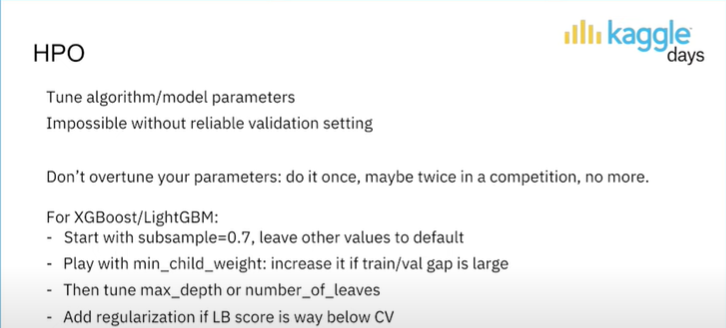

In [50]:
evallist = [(dtrain,'dtrain'),(dcv,'eval')]

In [51]:
param = {'num_parallel_tree' : 4, 'max_depth' : 10, 'subsample':0.7, 'min_child_weight': 3,
         'objective' : 'binary:logistic', 'eval_metric':'auc'}

In [52]:
bst = xgb.train(param, dtrain, 12, evallist)

[0]	dtrain-auc:0.89860	eval-auc:0.87282
[1]	dtrain-auc:0.90411	eval-auc:0.87807
[2]	dtrain-auc:0.90857	eval-auc:0.87856
[3]	dtrain-auc:0.91145	eval-auc:0.88022
[4]	dtrain-auc:0.91380	eval-auc:0.88057
[5]	dtrain-auc:0.91603	eval-auc:0.88040
[6]	dtrain-auc:0.91870	eval-auc:0.88042
[7]	dtrain-auc:0.92078	eval-auc:0.88115


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[8]	dtrain-auc:0.92253	eval-auc:0.88122
[9]	dtrain-auc:0.92471	eval-auc:0.88103
[10]	dtrain-auc:0.92664	eval-auc:0.88125
[11]	dtrain-auc:0.92880	eval-auc:0.88136


try setting monotonic_constariants: age

# Achieves 0.79 in kaggle, 0.815 top 50

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

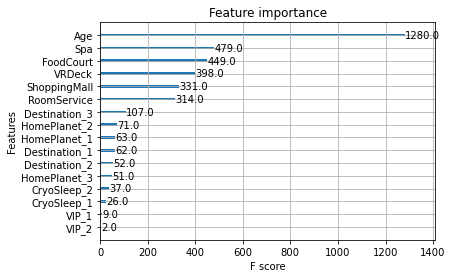

In [53]:
xgb.plot_importance(bst)

In [54]:
dtest = xgb.DMatrix(data = X_test)

In [55]:
k = bst.predict(dtest)

In [56]:
k

array([0.630256  , 0.05975478, 0.97923386, ..., 0.95045936, 0.82217413,
       0.57610947], dtype=float32)

In [57]:
df_train['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [58]:
predictions = []
for i in k:
    if(i>=0.5):
        predictions.append(1)
    else:
        predictions.append(0)

In [59]:
predictions[:5]

[1, 0, 1, 1, 1]

In [60]:
pre = [bool(k) for k in predictions]

In [61]:
pre[:5]

[True, False, True, True, True]

In [62]:
ss = pd.read_csv("sample_submission.csv")

In [63]:
submit = pd.DataFrame({ 'PassengerId':ss['PassengerId'], 'Transported':pre})

In [64]:
submit

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [65]:
submit.to_csv("submit.csv", index = False)

### With Backward Feature Selection

In [83]:
from sklearn.feature_selection import SequentialFeatureSelector

model = xgb.XGBClassifier()
sf = SequentialFeatureSelector(model, scoring='accuracy', direction = 'backward')
sf.fit(X_train,y_train)

best_features = list(sf.get_feature_names_out())
best_features

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_sequential.py:206: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'HomePlanet_3',
 'CryoSleep_2']

In [84]:
X_train_bf = X_train.loc[:,best_features]

In [85]:
X_cv_bf = X_cv.loc[:,best_features]

In [86]:
dtrain_bf = xgb.DMatrix(data = X_train_bf, label = y_train)
dcv_bf = xgb.DMatrix(data = X_cv_bf, label = y_cv)

In [88]:
evallist_bf = [(dtrain_bf,'dtrain_bf'),(dcv_bf,'eval_bf')]

In [106]:
param_bf = {'num_parallel_tree' : 6, 'max_depth' : 10, 'subsample':0.7, 'min_child_weight': 5,
         'objective' : 'binary:logistic', 'eval_metric':'auc'}
bst_bf = xgb.train(param_bf, dtrain_bf, 25, evallist_bf)

[0]	dtrain_bf-auc:0.87688	eval_bf-auc:0.85654
[1]	dtrain_bf-auc:0.88053	eval_bf-auc:0.86002
[2]	dtrain_bf-auc:0.88322	eval_bf-auc:0.85959
[3]	dtrain_bf-auc:0.88612	eval_bf-auc:0.85934
[4]	dtrain_bf-auc:0.88852	eval_bf-auc:0.86009
[5]	dtrain_bf-auc:0.88965	eval_bf-auc:0.86000
[6]	dtrain_bf-auc:0.89181	eval_bf-auc:0.86074
[7]	dtrain_bf-auc:0.89340	eval_bf-auc:0.86111
[8]	dtrain_bf-auc:0.89567	eval_bf-auc:0.86108
[9]	dtrain_bf-auc:0.89760	eval_bf-auc:0.86100
[10]	dtrain_bf-auc:0.89894	eval_bf-auc:0.86094
[11]	dtrain_bf-auc:0.90032	eval_bf-auc:0.86131
[12]	dtrain_bf-auc:0.90142	eval_bf-auc:0.86109
[13]	dtrain_bf-auc:0.90251	eval_bf-auc:0.86069
[14]	dtrain_bf-auc:0.90387	eval_bf-auc:0.86044
[15]	dtrain_bf-auc:0.90500	eval_bf-auc:0.86037
[16]	dtrain_bf-auc:0.90659	eval_bf-auc:0.86010
[17]	dtrain_bf-auc:0.90742	eval_bf-auc:0.85999
[18]	dtrain_bf-auc:0.90891	eval_bf-auc:0.85927
[19]	dtrain_bf-auc:0.91014	eval_bf-auc:0.85916
[20]	dtrain_bf-auc:0.91119	eval_bf-auc:0.85908
[21]	dtrain_bf-auc:0.91

## Random forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=5)
clf = clf.fit(X_train, y_train)

In [127]:
k = clf.predict(X_cv)

In [128]:
clf.score(X_cv, y_cv)

0.8013803680981595

In [108]:
pre = [bool(k) for k in predictions]

In [109]:
ss = pd.read_csv("sample_submission.csv")

In [110]:
submit = pd.DataFrame({ 'PassengerId':ss['PassengerId'], 'Transported':pre})

In [111]:
submit.to_csv("submit_rf.csv", index = False)